In this notebook we will use nltk librarie to analyse and clean the sms text body and then the random forest classifier algorithme to predict and classify the label of the sms based on the clean text.

let's load the required libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.offline as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
from plotly import tools
import plotly.figure_factory as ff

import nltk
import re
import string


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['spam.csv']


Let's begin by importing the spam dataset, and showing the first 5 rows.

In [2]:
data=pd.read_csv('../input/spam.csv',delimiter=',',encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Drop down the unnecessary columns

In [4]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

Let's show the 5 rows of our data again, using this time the plotly labrarie

In [5]:
py.iplot(ff.create_table(data.head()),filename='show_data')

Let's change the columns name

In [6]:
data.columns=['label','text']
py.iplot(ff.create_table(data.head()),filename='show_data')

In [7]:
data.text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

You can see that our text contains some punctuation characters so we need to deal with it

To do that we'll import the string labrarie and using the punctuation attribute, you can see all the attributes of this labrarie using the dir() function

In [8]:
dir(string)

['Formatter',
 'Template',
 '_ChainMap',
 '_TemplateMetaclass',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_re',
 '_string',
 'ascii_letters',
 'ascii_lowercase',
 'ascii_uppercase',
 'capwords',
 'digits',
 'hexdigits',
 'octdigits',
 'printable',
 'punctuation',
 'whitespace']

In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Let's create a function that will help us to remove the punctuation characters from the original text 

In [10]:
def remove_punctuation(text):
    new_text=''.join([char for char in text if char not in string.punctuation])
    return new_text

We'll apply this function to create a new column 


In [11]:
data['new_text']=data['text'].apply(lambda row : remove_punctuation(row))

In [12]:
data.head()

,label,text,new_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [13]:
print(data.text[0])
data.new_text[0]

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

You can see now that our text is out of punctuations

In the second step we'll split each text into tokens so let's create another function

In [14]:
def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens 

Let's apply this function and show our tokenized text

In [15]:
data['tokenized_text']=data['new_text'].apply(lambda row : tokenize(row.lower()))
data.head()

,label,text,new_text,tokenized_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


The next step is to remove the stopwords because they does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence.

Let's import the stop words and show the first 5 words in the list 

In [16]:
stopwords=nltk.corpus.stopwords.words('english')
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

So we need another function to remove the stop words

In [17]:
def remove_stopwords(text):
    clean_text=[word for word in text if word not in stopwords]
    return clean_text 

In [18]:
data['clean_text']=data['tokenized_text'].apply(lambda row : remove_stopwords(row))
data.head()

,label,text,new_text,tokenized_text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


Our final text preprocessing is the stemming step ,we'll use the PorterStemmer to do that. 

In [19]:
ps = nltk.PorterStemmer()

In [20]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In the list above we are interested in the stem method to create a stemmed text 

In [21]:
def stemming(tokenized_text):
    stemmed_text=[ps.stem(word) for word in tokenized_text]
    return stemmed_text

In [22]:
data['stemmed_text']=data.clean_text.apply(lambda row : stemming(row))
data[['text','stemmed_text']].head()

,text,stemmed_text
0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,U dun say so early hor... U c already then say...,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goe, usf, live, around, tho..."


So finally we'll join the stemmed words to create our final text 

In [23]:
def get_final_text(stemmed_text):
    final_text=" ".join([word for word in stemmed_text])
    return final_text

In [24]:
data['final_text']=data.stemmed_text.apply(lambda row : get_final_text(row))
data.head()

,label,text,new_text,tokenized_text,clean_text,stemmed_text,final_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though


Now we'll doing some feature engineering it's a necessary preprocessing step for machine learning 

In this data we have rows with texts so we need to transform each word in this texts into a feature column so let's do that ,we'll using TfidfVectorizer

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf_model=TfidfVectorizer()
tfidf_vec=tfidf_model.fit_transform(data.final_text)
tfidf_data=pd.DataFrame(tfidf_vec.toarray())
tfidf_data.head()

,0,1,2,3,4,5,6,7,8,9,...,8016,8017,8018,8019,8020,8021,8022,8023,8024,8025
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have now a data with 8026 columns each column represent a word 

We deleted the punctuation before, but what if they have impact on our label ? so let's create a feature with percentage of punctuations.

In [27]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [28]:
data['punct%'] = data['text'].apply(lambda x: count_punct(x))

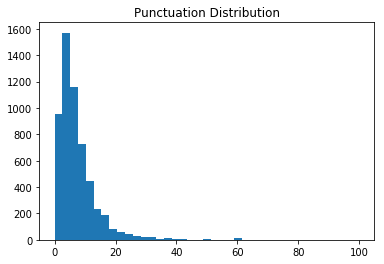

In [29]:
bins = np.linspace(0, 100, 40)
plt.hist(data['punct%'], bins)
plt.title("Punctuation Distribution")
plt.show()

The lenght of the text may too have an impact on our label? 

In [30]:
data['text_len'] = data['text'].apply(lambda x: len(x) - x.count(" "))

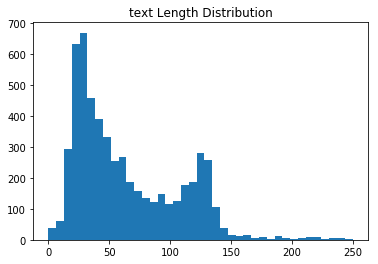

In [31]:
bins = np.linspace(0, 250, 40)
plt.hist(data['text_len'],bins)
plt.title("text Length Distribution")
plt.show()

In [32]:
final_data=pd.concat([data['punct%'],data['text_len'],tfidf_data],axis=1)
final_data.head()

,punct%,text_len,0,1,2,3,4,5,6,7,...,8016,8017,8018,8019,8020,8021,8022,8023,8024,8025
0,9.8,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.7,128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15.4,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.1,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Our final data have now 8028 columns

It's time for machine learning, we'll build a classification model using RandomForestClassifer

In [33]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(final_data,data['label'],test_size=.2)

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [36]:
rf_prediction=rf_model.predict(X_test)

In [37]:
precision,recall,fscore,support = score(y_test,rf_prediction,pos_label='spam',average='binary')

In [38]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((rf_prediction==y_test).sum() / len(rf_prediction),3)))

Precision: 0.992 / Recall: 0.843 / Accuracy: 0.979


You can use the model feature_importances_ attribute to check the features that have been very significant  in our model 

In [39]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.04073785563974004, 1776),
 (0.039058525894062106, 'text_len'),
 (0.03483594361120348, 7268),
 (0.02130442124506553, 3103),
 (0.017919728968897746, 5661),
 (0.01664504695242743, 6671),
 (0.016225718111734205, 6212),
 (0.014173798160980643, 4745),
 (0.013986361783512475, 7139),
 (0.013390434667792177, 2005)]

To tune the model hyperparameters you can use the Grid Search methode

Grid-search: Exhaustively search all parameter combinations in a given grid to determine the best model.

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
rfg = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rfg, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(final_data, data['label'])

In [42]:
print(gs_fit.best_params_)
print(gs_fit.best_score_)

{'max_depth': None, 'n_estimators': 300}
0.9745154343144293
